
Chart your spending waters -- Budget Shark keeps you on course!


Please select what would you like to do 
1. Add Expense
2. Set Budgets for each category
3. Show me my budgeting performance
4. Exit Budget Shark

setting monthly budget by categories
{'F&B': 300.0, 'INVESTMENTS': 500.0, 'HOLIDAYS': 500.0}
Budgets for each category has been created


Please select what would you like to do 
1. Add Expense
2. Set Budgets for each category
3. Show me my budgeting performance
4. Exit Budget Shark

Creating new expense

Expense added:
Date: 12-06-2025
Category: F&B
Amount: $100.00
Description: lunch


Please select what would you like to do 
1. Add Expense
2. Set Budgets for each category
3. Show me my budgeting performance
4. Exit Budget Shark

Creating new expense

Expense added:
Date: 11-06-2025
Category: INVESTMENTS
Amount: $600.00
Description: Holidays


Please select what would you like to do 
1. Add Expense
2. Set Budgets for each category
3. Show me my budgeting performance
4. Exit 

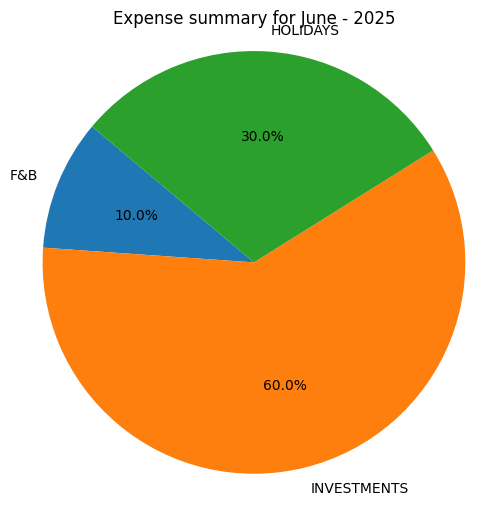



Please select what would you like to do 
1. Add Expense
2. Set Budgets for each category
3. Show me my budgeting performance
4. Exit Budget Shark
Ok, Goodbye!


In [1]:
from datetime import datetime
import matplotlib.pyplot as plt 
from collections import defaultdict
import calendar
import sys

date_format = "%d-%m-%Y"
expenses = []
budgets = {}

def main():
    
    print("\nChart your spending waters -- Budget Shark keeps you on course!")
    sys.stdout.flush()
    while True:
        print("\n")
        print("Please select what would you like to do ")
        print("1. Add Expense")
        print("2. Set Budgets for each category")
        print("3. Show me my budgeting performance")
        print("4. Exit Budget Shark")
        sys.stdout.flush()
        selection = input("Enter your choice: ")

#user to select option from menu
        if selection == "1":
            create_expense()
        elif selection == "2":
            set_budget()
        elif selection == "3": 
            try:
                month = int(input("Enter a month for summary report (values should be 01-12): "))
                year = int(input("Enter a year for summary report (for eg: 2025): "))
                summary(month,year)
            except ValueError:
                print("Invalid month or year inputted, please try again.")
                sys.stdout.flush()

        elif selection == "4": 
            print("Ok, Goodbye!")
            break
        else: 
            print("Invalid choice. Please try again.")
            sys.stdout.flush()
                       

def get_valid_date():
    while True: 
        date_input = input("Enter date(DD-MM-YYYY): ")
        try: 
            datetime.strptime(date_input,date_format)
        except ValueError:
            print("Invalid date or date format. Please try again")
            sys.stdout.flush()
            continue    
        return date_input  


def get_valid_amount():
    while True: 
        amount = input("Enter amount: ")
        try:
            expense_amount = float(amount)
            if 0<expense_amount: 
                return expense_amount
            else: 
                print("Please enter a positive amount.")
                sys.stdout.flush()

        except ValueError: 
            print("Invalid amount, input must contain numbers. Please try again")
            sys.stdout.flush()

def get_valid_budget_amount():
    while True: 
        b_amount = input("Enter monthly budget amount for this category: ")
        try:
            budget_amount = float(b_amount)
            if 0<budget_amount: 
                return budget_amount
            else: 
                print("Please enter a positive amount.")
                sys.stdout.flush()

        except ValueError: 
            print("Invalid amount, input must contain numbers. Please try again")
            sys.stdout.flush()

def create_expense():
    #creating each expense with mandatory expense date, category, amount. Description is optional
    print("\nCreating new expense")
    sys.stdout.flush()
    date_str = get_valid_date()
    date = datetime.strptime(date_str,date_format).date()
    category = input("Enter category: ")
    category = category.upper()
    amount = get_valid_amount()
    description = input("Enter description(optional): ")
    expense = {
        "date": date,
        "category": category,
        "amount": amount,
        "description": description
    }
    expenses.append(expense)
    print("\nExpense added:")
    print(f"Date: {date.strftime('%d-%m-%Y')}")
    print(f"Category: {category}")
    print(f"Amount: ${amount:.2f}")
    print(f"Description: {description if description else 'N/A'}")
    sys.stdout.flush()

def set_budget():
    #creating budget for each category
    print("\nsetting monthly budget by categories")
    sys.stdout.flush()
    while True: 
        category_input = input("Enter a category(keep this blank and press enter if you would like to stop inputting new category budget): ")
        category_input = category_input.upper()
        if category_input == "":
            break
        else: 
            final_budget = get_valid_budget_amount()
        budgets[category_input] = final_budget
    print(budgets)
    print("Budgets for each category has been created")
    sys.stdout.flush()

def summary(month: int,year: int):
    #Summary will be generated once user inputs valid month and year
    #validate month and year input for summary option
    if not (1 <= month <= 12):
        print("Invalid month. Please enter a value between 01 and 12.")
        sys.stdout.flush()
        return
    if not (1900 <= year <= 2100):
        print("Invalid year. Please enter a valid year between 1900 and 2100.")
        sys.stdout.flush()
        return
    
    print("\nExpense Summary for chosen month")
    sys.stdout.flush()
    total_category_expense = defaultdict(float)
    for e in expenses: 
        date = e["date"]
        if isinstance(date,str):
            try:
                date = datetime.strptime(date, date_format).date()
                e["date"] = date
            except ValueError: 
                continue
        if date.year == year and date.month == month: 
            total_category_expense[e["category"]] += e["amount"]
    
    for cat, total in total_category_expense.items():
        #tells user if they have exceeded budget for each category for the specified month
        budget = budgets.get(cat,0)
        print(f"{cat}: Spent: ${total:.2f} | Budget: ${budget:.2f} -> {"over budget" if total>budget else "Within budget"}")
        sys.stdout.flush()
    month_name = calendar.month_name[month]
    #shows proportion of spending by categories in pie chart for the specified month
    if total_category_expense: 
        plt.figure(figsize=(6,6))
        plt.title(f"Expense summary for {month_name} - {year}")
        plt.pie(total_category_expense.values(), labels = total_category_expense.keys(), autopct='%1.1f%%', startangle=140)
        plt.axis("equal")
        plt.show()
        sys.stdout.flush()
    else:
        print("No expense data was stored for the month specified.")
        sys.stdout.flush()
        
if __name__ == '__main__':
    main()
